In [57]:
%pylab inline
import matplotlib.pyplot as pl
from astropy.io import fits
from ngmix.medsreaders import NGMixMEDS
import numpy as np
import galsim
import fitsio
import meds
import astropy.io.fits as pf

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/chihway/.conda/envs/shear_decade/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['exp']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
decade_dir='/project2/chihway/data/decade/decade.ncsa.illinois.edu/deca_archive/ACT/multiepoch/delve/r5914/'
File_list = ['DES0656+2500']


In [14]:
i=0

XX = []
for band in ['g','r','i','z']:
    
    X = meds.MEDS(decade_dir+File_list[i]+'/p04/meds/'+File_list[i]+'_r5914p04_'+band+'_meds-delve.fits.fz')
    if band == 'g':
        print('Tile '+File_list[i][:11]+' has '+str(X.size)+' objects')
        
    XX.append(X)

Tile DES0656+250 has 52326 objects


In [46]:
file_dir = '/project2/chihway/data/decade/decade.ncsa.illinois.edu/deca_archive/ACT/multiepoch/delve/r5914/DES0656+2500/p04/cat/'
infile_det = fits.open(file_dir+'DES0656+2500_r5914p04_det_cat.fits')
infile_g = fits.open(file_dir+'DES0656+2500_r5914p04_g_cat.fits')
infile_r = fits.open(file_dir+'DES0656+2500_r5914p04_r_cat.fits')
infile_i = fits.open(file_dir+'DES0656+2500_r5914p04_i_cat.fits')
infile_z = fits.open(file_dir+'DES0656+2500_r5914p04_z_cat.fits')

file_dir_wavg = '/project2/chihway/data/decade/decade.ncsa.illinois.edu/deca_archive/ACT/multiepoch/delve/r5914/DES0656+2500/p04/wavg/'
infile_g_wavg = fits.open(file_dir_wavg+'DES0656+2500_r5914p04_g_wavg.fits')
infile_r_wavg = fits.open(file_dir_wavg+'DES0656+2500_r5914p04_r_wavg.fits')
infile_i_wavg = fits.open(file_dir_wavg+'DES0656+2500_r5914p04_i_wavg.fits')
infile_z_wavg = fits.open(file_dir_wavg+'DES0656+2500_r5914p04_z_wavg.fits')

# infile_g[1].header

In [48]:
# infile_det[1].data['number']
infile_det[1].header

XTENSION= 'BINTABLE'           / THIS IS A BINARY TABLE (FROM THE LDACTOOLS)    
BITPIX  =                    8 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  946 / BYTES PER ROW                                  
NAXIS2  =                52326 / NUMBER OF ROWS                                 
PCOUNT  =                    0 / RANDOM PARAMETER COUNT                         
GCOUNT  =                    1 / GROUP COUNT                                    
TFIELDS =                  168 / FIELDS PER ROWS                                
EXTNAME = 'OBJECTS '           / TABLE NAME                                     
TTYPE1  = 'NUMBER  '           / Running object number                          
TFORM1  = '1J      '                                                            
TDISP1  = 'I10     '                                                            
TTYPE2  = 'FLAGS   '        

In [8]:
full_data_g = infile_g[1].data
full_data_r = infile_r[1].data
full_data_i = infile_i[1].data
full_data_z = infile_z[1].data
full_data_g_wavg = infile_g_wavg[1].data
full_data_r_wavg = infile_r_wavg[1].data
full_data_i_wavg = infile_i_wavg[1].data
full_data_z_wavg = infile_z_wavg[1].data


mask_SEflag = (full_data_g['FLAGS']<=3)*(full_data_r['FLAGS']<=3)*(full_data_i['FLAGS']<=3)*(full_data_z['FLAGS']<=3)
mask_IMAflag = (full_data_g['IMAFLAGS_ISO']==0)*(full_data_r['IMAFLAGS_ISO']==0)*(full_data_i['IMAFLAGS_ISO']==0)*(full_data_z['IMAFLAGS_ISO']==0)
extend_coadd = np.array(((full_data_i_wavg['WAVG_SPREAD_MODEL']+3*full_data_i_wavg['WAVG_SPREADERR_MODEL'])>0.005))*1 + np.array((full_data_i_wavg['WAVG_SPREAD_MODEL']+full_data_i_wavg['WAVG_SPREADERR_MODEL'])>0.003) *1 + np.array((full_data_i_wavg['WAVG_SPREAD_MODEL']-full_data_i_wavg['WAVG_SPREADERR_MODEL'])>0.002)*1
mask_extend = (extend_coadd>=2)
SNR_R = full_data_r['FLUX_AUTO']/full_data_r['FLUXERR_AUTO']
mask_snr = (SNR_R>5)
size_R = full_data_r['FLUX_RADIUS']*0.236
mask_size = (size_R>0.5)

/tmp/ipykernel_47993/2699063739.py:15: RuntimeWarning: invalid value encountered in true_divide
  SNR_R = full_data_r['FLUX_AUTO']/full_data_r['FLUXERR_AUTO']


## Number counts with various cuts

In [9]:
area = 0.73*0.73*60*60
print('original', len(infile_i[1].data), len(infile_i[1].data)/area)
print('SE flags', len(infile_i[1].data[mask_SEflag]), len(infile_i[1].data[mask_SEflag])/area)
print('IMA_ISO flags', len(infile_i[1].data[mask_SEflag*mask_IMAflag]),len(infile_i[1].data[mask_SEflag*mask_IMAflag])/area)
print('extend_class flags', len(infile_i[1].data[mask_SEflag*mask_IMAflag*mask_extend]), len(infile_i[1].data[mask_SEflag*mask_IMAflag*mask_extend])/area)
print('SNR cut', len(infile_i[1].data[mask_SEflag*mask_IMAflag*mask_extend*mask_snr]), len(infile_i[1].data[mask_SEflag*mask_IMAflag*mask_extend*mask_snr])/area)
print('size cut', len(infile_i[1].data[mask_SEflag*mask_IMAflag*mask_extend*mask_snr*mask_size]), len(infile_i[1].data[mask_SEflag*mask_IMAflag*mask_extend*mask_snr*mask_size])/area)


original 52326 27.27528617001314
SE flags 50657 26.40530847980651
IMA_ISO flags 35407 18.456141448260045
extend_class flags 11449 5.967869727486917
SNR cut 8241 4.295677738162257
size cut 8071 4.207064072892559


## Magnitude distributions with various cuts

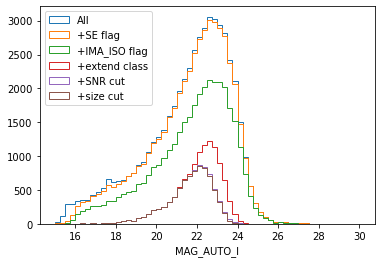

In [10]:
pl.hist(full_data_i['MAG_AUTO'], range=(15,30), bins=60, histtype='step', label='All')
pl.hist(full_data_i['MAG_AUTO'][mask_SEflag], range=(15,30), bins=60, histtype='step', label='+SE flag')
pl.hist(full_data_i['MAG_AUTO'][mask_SEflag*mask_IMAflag], range=(15,30), bins=60, histtype='step', label='+IMA_ISO flag')
pl.hist(full_data_i['MAG_AUTO'][mask_SEflag*mask_IMAflag*mask_extend], range=(15,30), bins=60, histtype='step', label='+extend class')
pl.hist(full_data_i['MAG_AUTO'][mask_SEflag*mask_IMAflag*mask_extend*mask_snr], range=(15,30), bins=60, histtype='step', label='+SNR cut')
pl.hist(full_data_i['MAG_AUTO'][mask_SEflag*mask_IMAflag*mask_extend*mask_snr*mask_size], range=(15,30), bins=60, histtype='step', label='+size cut')
pl.xlabel('MAG_AUTO_I')
pl.legend(loc=2)

## Plots for extended class

Text(0, 0.5, 'WAVG_SPREAD_MODEL_I')

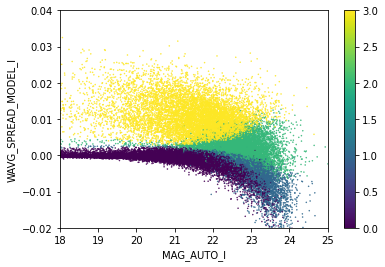

In [11]:
pl.scatter(full_data_i['MAG_AUTO'], full_data_i_wavg['WAVG_SPREAD_MODEL'], c=extend_coadd, marker='.',s=1)
pl.xlim(18,25)
pl.ylim(-0.02,0.04)
pl.colorbar()
pl.xlabel('MAG_AUTO_I')
pl.ylabel('WAVG_SPREAD_MODEL_I')

## Look at random selection of objects in MEDS file

In [15]:
arr = np.arange(XX[0].size)
np.random.shuffle(arr)

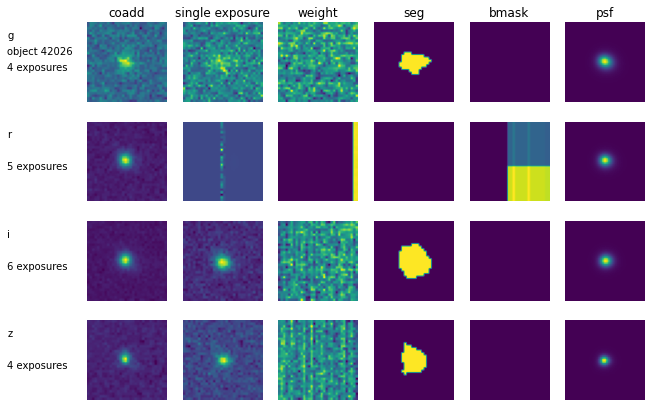

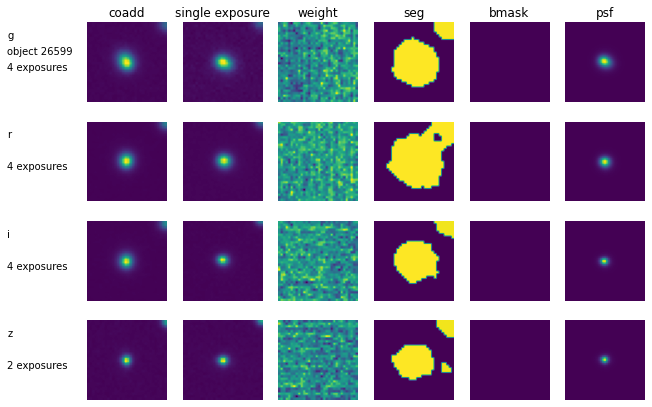

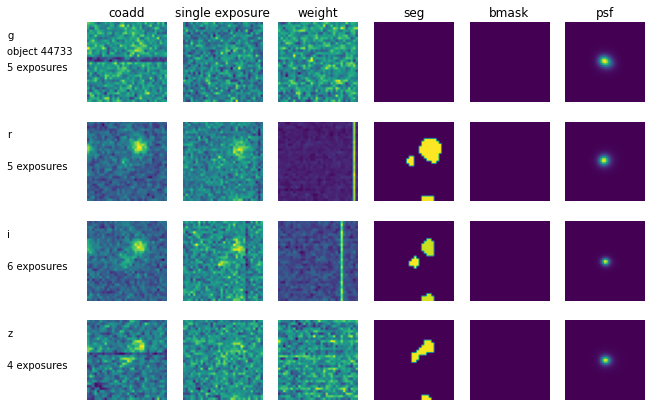

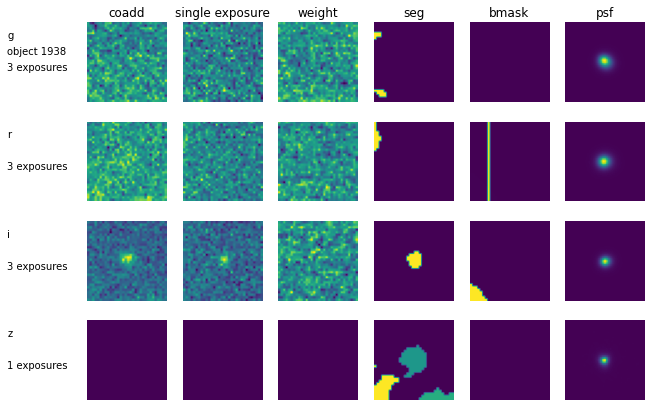

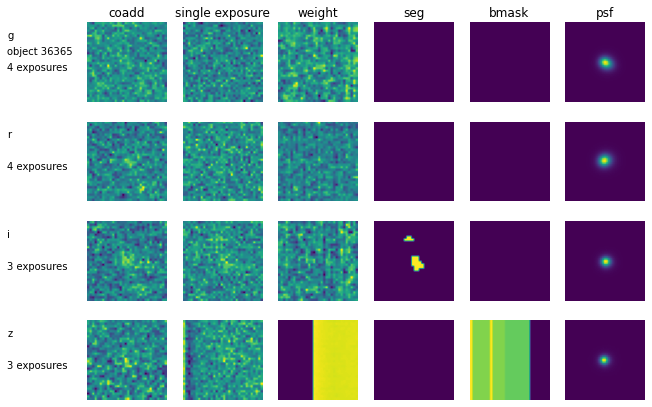

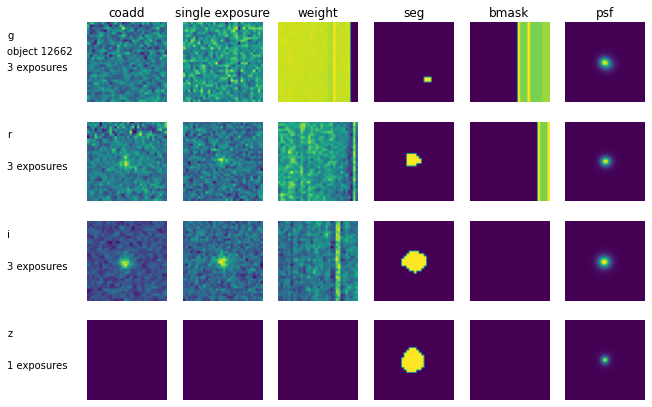

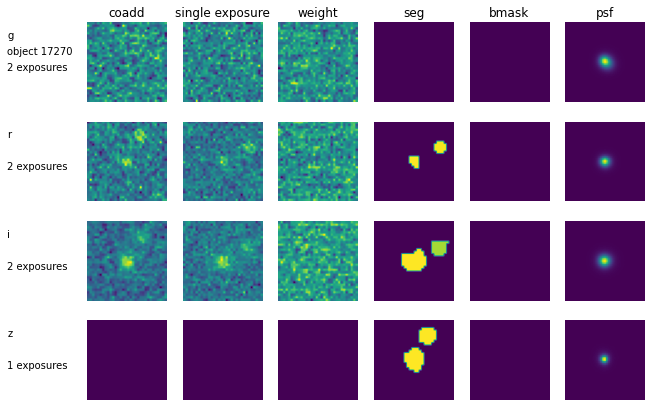

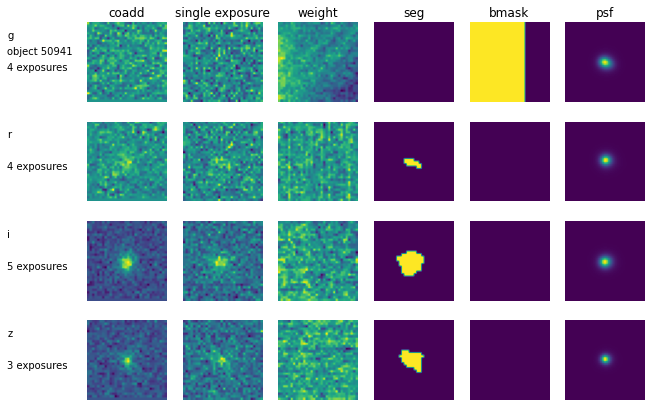

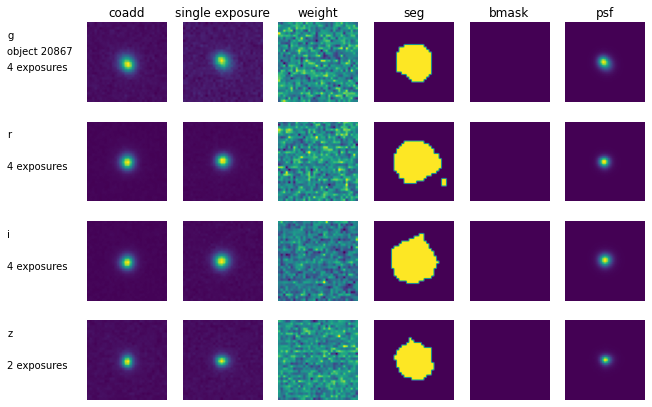

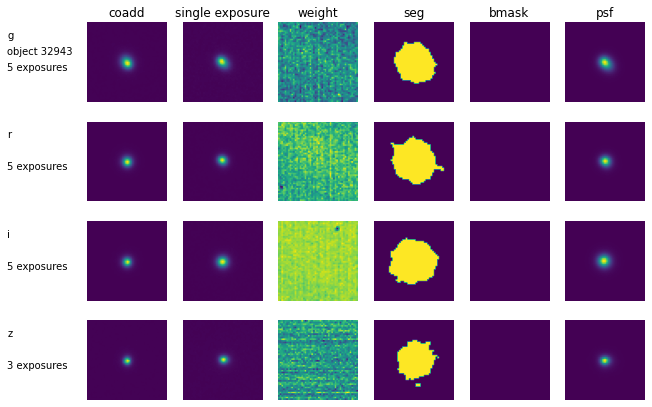

In [16]:
for ii in range(10):
    
    j = arr[ii]
    
    fig, axarr = pl.subplots(4, 6,figsize=(10,7))

    axarr[0,0].text(-1,0.8,'g',transform=axarr[0,0].transAxes)
    axarr[0,0].text(-1,0.6,'object '+str(j),transform=axarr[0,0].transAxes)
    axarr[1,0].text(-1,0.8,'r',transform=axarr[1,0].transAxes)
    axarr[2,0].text(-1,0.8,'i',transform=axarr[2,0].transAxes)
    axarr[3,0].text(-1,0.8,'z',transform=axarr[3,0].transAxes)
    
    axarr[0,0].set_title('coadd')
    axarr[0,1].set_title('single exposure')
    axarr[0,2].set_title('weight')
    axarr[0,3].set_title('seg')
    axarr[0,4].set_title('bmask')
    axarr[0,5].set_title('psf')

    
    for band in range(4):

        ncutout = XX[band]['ncutout'][j]
        axarr[band,0].text(-1,0.4,str(ncutout)+' exposures',transform=axarr[band,0].transAxes)

        # coadd
        images = XX[band].get_cutout(j,0)
        axarr[band,0].imshow(images)
        axarr[band,0].axis('off')

        if ncutout==1:
            exp = 0
        else:
            # random single exposure
            exp = np.random.randint(1,ncutout)
        images = XX[band].get_cutout(j,exp)
        axarr[band,1].imshow(images)
        axarr[band,1].axis('off')

        # weight
        images = XX[band].get_cutout(j,exp, type='weight')
        axarr[band,2].imshow(images)
        axarr[band,2].axis('off')

        # seg
        images = XX[band].get_cutout(j,exp, type='seg')
        axarr[band,3].imshow(images)
        axarr[band,3].axis('off')

        # bmask
        images = XX[band].get_cutout(j,exp, type='bmask')
        axarr[band,4].imshow(images)
        axarr[band,4].axis('off')

        # psf
        images = XX[band].get_psf(j,exp)
        axarr[band,5].imshow(images)
        axarr[band,5].axis('off')
        
        
        pl.savefig(File_list[i][:12]+'_test_'+str(ii)+'.png')

## Check metacal output

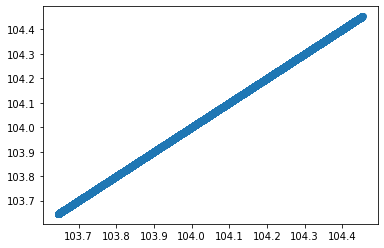

In [53]:
ra_meds = XX[0]['ra']
ra_cat = infile_det[1].data['ALPHAWIN_J2000']
pl.scatter(ra_meds, ra_cat)
# wohoo! these are matched!

In [54]:
ids_cat = np.arange(len(ra_cat))
ids_cat = ids_cat[mask_SEflag*mask_IMAflag*mask_extend]

In [55]:
len(ids_cat), len(ra_cat)

(11449, 52326)

In [62]:
mcal_infile = pf.open('/project2/chihway/data/decade/shearcat_v1/metacal_output_DES0656+2500.fits')[1].data
mask_gold = (mask_SEflag*mask_IMAflag*mask_extend)
mask_mcal = (mcal_infile['mcal_flags']==0)

S2N = mcal_infile['mcal_s2n_noshear']
SIZE = mcal_infile['mcal_T_ratio_noshear']
print(len(S2N))
mask_s2n = (S2N>10)
mask_size = (SIZE>0.5)

len(ids_cat[mask_gold*mask_s2n*mask_size])/(0.73*0.73*60*60)


TypeError: 'FITS_rec' object is not callable

In [65]:
pf.open('/project2/chihway/data/decade/shearcat_v1/metacal_output_DES0656+2500.fits')[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 3996 / width of table in bytes                        
NAXIS2  =                30400 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   71 / number of fields in each row                   
TTYPE1  = 'id      '           / label for field   1                            
TFORM1  = 'K       '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'x       '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'y       '        